# Pré-processamento

In [ ]:
!pip install matplotlib nltk pandas seaborn wordcloud

In [ ]:
# Importacao das bibliotecas e funcoes utilizadas
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [ ]:
# Leitura do dataset
# try:
#   df = pd.read_csv('/content/drive/MyDrive/Datasets/produtos.csv', delimiter=';')
# except:
#   drive.mount('/content/drive/')
#   df = pd.read_csv('/content/drive/MyDrive/Datasets/produtos.csv', delimiter=';')

df = pd.read_csv('produtos.csv', delimiter=';')
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


Alguns dados da coluna 'descrição' estão faltando, e todas as outras colunas não possuem valores nulos. Todos os dados são strings.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB


O target aqui é a categoria, e todas as 4 classes estão balanceadas

In [ ]:
print(df.groupby('categoria').size())

categoria
brinquedo    1020
game         1020
livro        1020
maquiagem    1020
dtype: int64


Pre-processamento para concatenação do nome do produto e descrição

eliminação das colunas de nome e descricao

In [ ]:
df = df.astype(str)

In [ ]:
# Concatenando as colunas 'nome' e 'descricao' em uma mesma coluna 'informacao

df['informacao'] = df[['nome', 'descricao']].agg('-'.join, axis=1).str.lower()
df.rename(columns={'categoria' : 'target'}, inplace=True)
df[['informacao', 'target']].head()

,informacao,target
0,o hobbit - 7ª ed. 2013 -produto novobilbo bol...,livro
1,livro - it a coisa - stephen king -produto no...,livro
2,box as crônicas de gelo e fogo pocket 5 li...,livro
3,box harry potter -produto novo e físico a sé...,livro
4,livro origem - dan brown -produto novode onde...,livro


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# Funcao que remove os stop words dos textos de uma coluna do dataset
def remove_stopwords(df, text_column):

    stop_words = set(stopwords.words('portuguese'))

    # Funcao que remove os stop words de uma sentenca
    def remove_stopwords_from_sentence(sentence):

        words = word_tokenize(sentence)
        filtered_sentence = [word for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_sentence)

    # Aplicacao da funcao na coluna de texto especificada em sua chamada
    df['informacao_limpa'] = df[text_column].apply(remove_stopwords_from_sentence)

    return df.astype(str)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Remocao dos stopwords da coluna 'informacao'
df = remove_stopwords(df, 'informacao')
df[['target', 'informacao', 'informacao_limpa']].head()

,target,informacao,informacao_limpa
0,livro,o hobbit - 7ª ed. 2013 -produto novobilbo bol...,hobbit - 7ª ed . 2013 -produto novobilbo bolse...
1,livro,livro - it a coisa - stephen king -produto no...,livro - it coisa - stephen king -produto novod...
2,livro,box as crônicas de gelo e fogo pocket 5 li...,box crônicas gelo fogo pocket 5 livros -produt...
3,livro,box harry potter -produto novo e físico a sé...,box harry potter -produto novo físico série ha...
4,livro,livro origem - dan brown -produto novode onde...,livro origem - dan brown -produto novode onde ...


In [ ]:
# comparacao das colunas com stopwords e sem stopwords
print(df['informacao'][0])
print(df['informacao_limpa'][0])

 o hobbit - 7ª ed. 2013 -produto novobilbo bolseiro é um hobbit que leva uma vida confortável e sem ambições. mas seu contentamento é perturbado quando gandalf, o mago, e uma companhia de anões batem à sua porta e levam-no para uma expedição. eles têm um plano para roubar o tesouro guardado por smaug, o magnífico, um grande e perigoso dragão. bilbo reluta muito em participar da aventura, mas acaba surpreendendo até a si mesmo com sua esperteza e sua habilidade como ladrão!característicasautor: tolkien, j. r. r.peso: 0.44i.s.b.n.: 9788578277109altura: 20.000000largura: 13.000000profundidade: 1.000000número de páginas: 328idioma: portuguêsacabamento: brochuranúmero da edição: 7ano da edição: 2013
hobbit - 7ª ed . 2013 -produto novobilbo bolseiro hobbit leva vida confortável ambições . contentamento perturbado gandalf , mago , companhia anões batem porta levam-no expedição . têm plano roubar tesouro guardado smaug , magnífico , grande perigoso dragão . bilbo reluta participar aventura , a

## Visualização dos dados

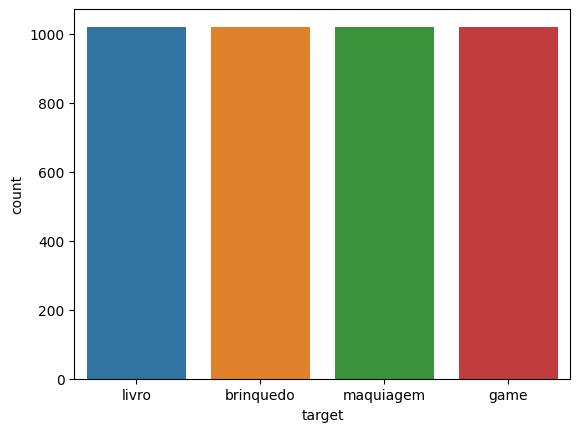

In [ ]:
# Plotagem do gráfico por categoria ('target')
sns.countplot(x=df['target'],label="Count")
plt.show()

### Wordcloud

In [ ]:
# Funcao que cria um WordCloud de uma coluna textual de um dataset
def create_wordcloud(df, text_column, color='blue'):

    text = ' '.join(df[text_column].astype(str))
    word_cloud = WordCloud(width=3000,
                           height=2000,
                           random_state=1,
                           background_color=color,
                           collocations=False).generate(text)

    # Conversao do WordCloud em um array NumPy (imagem)
    return word_cloud.to_array()

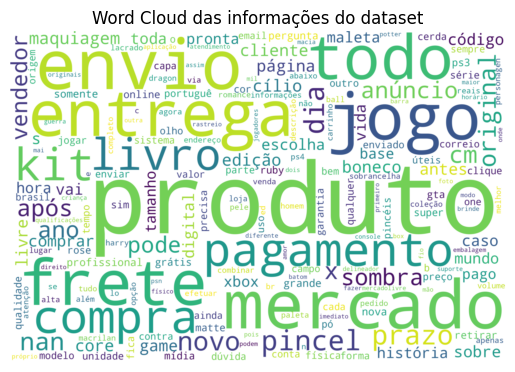

In [ ]:
# Criacao do WordCloud da coluna 'informacao_limpa' do dataset inteiro
# Obs.: nao ha distincao entre as categorias de produtos
word_cloud_image = create_wordcloud(df, 'informacao_limpa', color='white')

# Plotagem do WordCloud como imagem
plt.imshow(word_cloud_image, interpolation='bilinear')
plt.title('Word Cloud das informações do dataset')
plt.axis('off')
plt.show()

In [ ]:
wordcloud_livro = create_wordcloud(df[df['target'] == 'livro'], 'informacao_limpa', color='blue')
wordcloud_brinquedo = create_wordcloud(df[df['target'] == 'brinquedo'], 'informacao_limpa', color='orange')
wordcloud_maquiagem = create_wordcloud(df[df['target'] == 'maquiagem'], 'informacao_limpa', color='green')
wordcloud_game = create_wordcloud(df[df['target'] == 'game'], 'informacao_limpa', color='red')

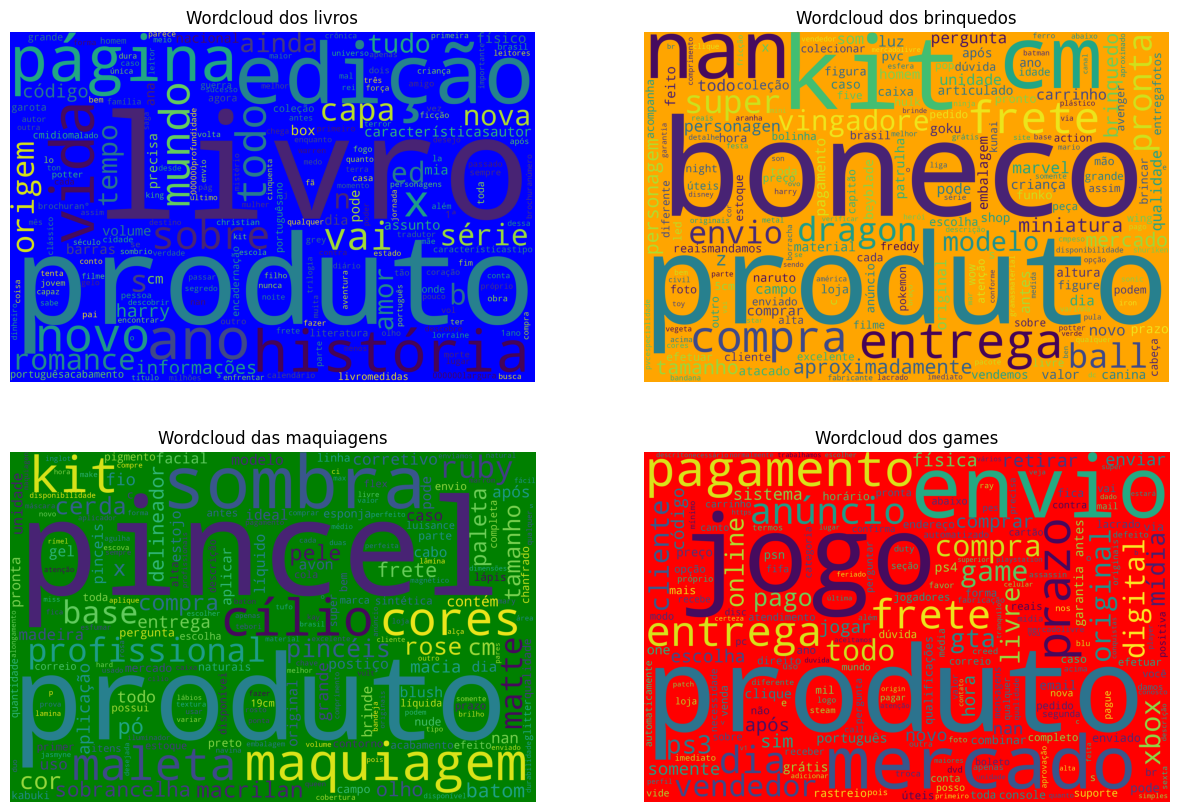

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Wordcloud dos livros")
plt.imshow(wordcloud_livro)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Wordcloud dos brinquedos")
plt.imshow(wordcloud_brinquedo)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Wordcloud das maquiagens")
plt.imshow(wordcloud_maquiagem)
plt.axis("off")


plt.subplot(2, 2, 4)
plt.title("Wordcloud dos games")
plt.imshow(wordcloud_game)
plt.axis("off")

plt.show()

In [ ]:
n_linhas = len(df['target'].unique()) // 2 if len(df['target'].unique()) % 2 == 0 else len(df['target'].unique()) // 2 + 1

target_colors = {'livro' : 'blue',
                 'brinquedo' : 'orange',
                 'maquiagem' : 'green',
                 'game' : 'red'}

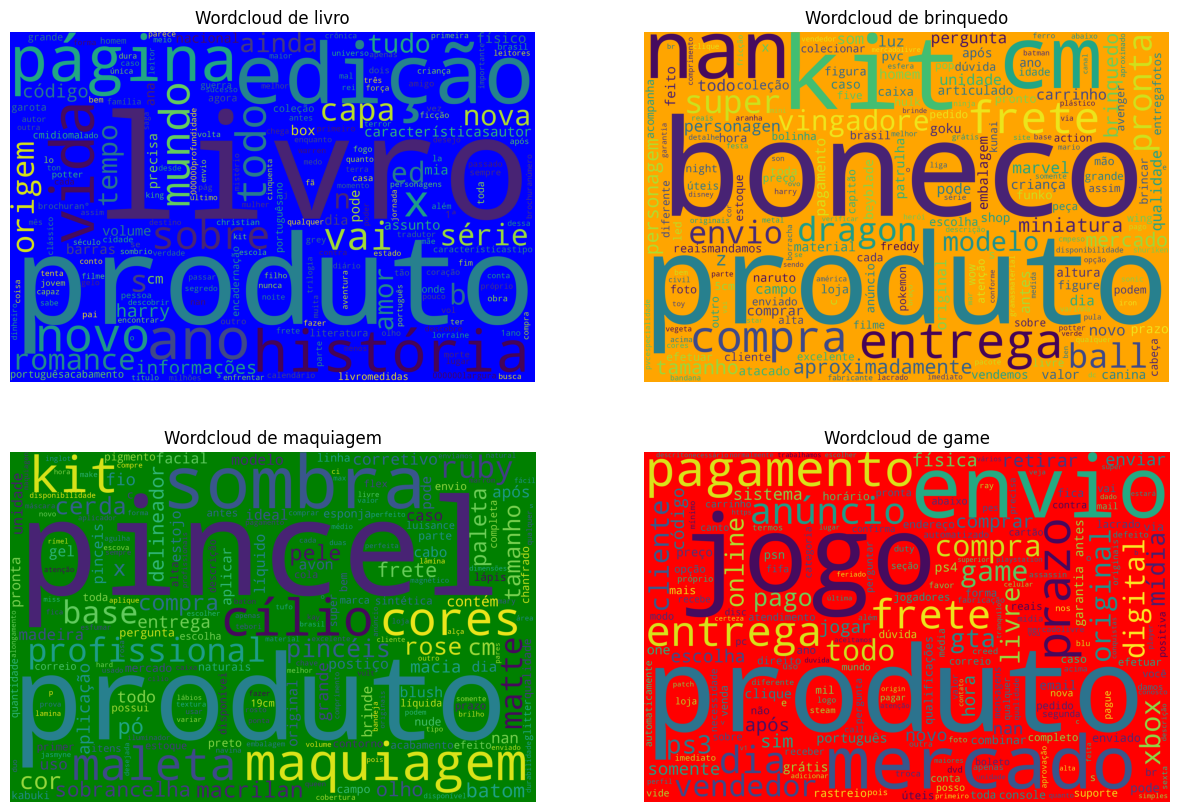

In [ ]:
plt.figure(figsize=(15, n_linhas*5))

for index, target in enumerate(df['target'].unique()):

    wordcloud = create_wordcloud(df[df['target'] == target], 'informacao_limpa', color=target_colors[target])

    plt.subplot(2, n_linhas, index+1)
    plt.title(f'Wordcloud de {target}')
    plt.imshow(wordcloud)
    plt.axis('off')

plt.show()

## Separação das palavras e remoção da pontuação

In [ ]:
tokenizer = nltk.RegexpTokenizer(r"\w+")                        # Expressao regular usada para fazer a tokenizacao (tokens como palavras)
df['tokens'] = df['informacao_limpa'].apply(tokenizer.tokenize) # Aplicacao do tokenizador na coluna de informacao sem stopwords
print(df['tokens'].head())                                      # Tokens sem stopwords
print()

fdist = df['tokens'].apply(FreqDist)                            # Calculo da frequencia de cada token (quantidade de vezes que aparece em cada coluna)
print(fdist.head())                                             # Frequencia dos tokens SEM stopwords

0    [hobbit, 7ª, ed, 2013, produto, novobilbo, bol...
1    [livro, it, coisa, stephen, king, produto, nov...
2    [box, crônicas, gelo, fogo, pocket, 5, livros,...
3    [box, harry, potter, produto, novo, físico, sé...
4    [livro, origem, dan, brown, produto, novode, o...
Name: tokens, dtype: object

0    {'hobbit': 2, '7ª': 1, 'ed': 1, '2013': 2, 'pr...
1    {'livro': 1, 'it': 2, 'coisa': 5, 'stephen': 2...
2    {'box': 2, 'crônicas': 3, 'gelo': 3, 'fogo': 3...
3    {'box': 2, 'harry': 26, 'potter': 21, 'produto...
4    {'livro': 1, 'origem': 2, 'dan': 1, 'brown': 2...
Name: tokens, dtype: object


A impressão acima mostra a frequência das palavras após tratamentos para lowercase e sem stopwords. Abaixo segue as listas sem tratamentos.

In [ ]:
fdist_com_stopwords = df['informacao'].apply(tokenizer.tokenize).apply(FreqDist)  # Calculo da frequencia de cada token, incluindo stopwords
print(fdist_com_stopwords.head())                                                 # Frequencia dos tokens COM stopwords

0    {'o': 4, 'hobbit': 2, '7ª': 1, 'ed': 1, '2013'...
1    {'livro': 1, 'it': 2, 'a': 10, 'coisa': 5, 'st...
2    {'box': 2, 'as': 1, 'crônicas': 3, 'de': 9, 'g...
3    {'box': 2, 'harry': 26, 'potter': 21, 'produto...
4    {'livro': 1, 'origem': 2, 'dan': 1, 'brown': 2...
Name: informacao, dtype: object


In [ ]:
df[['target', 'informacao', 'informacao_limpa', 'tokens']].head()

,target,informacao,informacao_limpa,tokens
0,livro,o hobbit - 7ª ed. 2013 -produto novobilbo bol...,hobbit - 7ª ed . 2013 -produto novobilbo bolse...,"[hobbit, 7ª, ed, 2013, produto, novobilbo, bol..."
1,livro,livro - it a coisa - stephen king -produto no...,livro - it coisa - stephen king -produto novod...,"[livro, it, coisa, stephen, king, produto, nov..."
2,livro,box as crônicas de gelo e fogo pocket 5 li...,box crônicas gelo fogo pocket 5 livros -produt...,"[box, crônicas, gelo, fogo, pocket, 5, livros,..."
3,livro,box harry potter -produto novo e físico a sé...,box harry potter -produto novo físico série ha...,"[box, harry, potter, produto, novo, físico, sé..."
4,livro,livro origem - dan brown -produto novode onde...,livro origem - dan brown -produto novode onde ...,"[livro, origem, dan, brown, produto, novode, o..."


## Stemmer

Extrai o sufixo das palavras, usado para facilitar a associação entre palavras com sentidos próximos.

Precisão razoável.

A seguir pode-se ver um exemplo:

In [ ]:
stemmer = SnowballStemmer("portuguese") # Escolha da lingua do steammer (suporte para portugues)

In [ ]:
# Exemplos de uso do stemmer
print(stemmer.stem("livro"))
print(stemmer.stem("livreiro"))
print(stemmer.stem("livraria"))

livr
livreir
livr


In [ ]:
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(y) for y in x])  # Aplicacao do stemmer pra cada palavra (token)

In [ ]:
df[['target', 'informacao_limpa', 'stemmed']].head()  # Comparacao entre informacao sem stopwords e tokens depois do stemmerization

,target,informacao_limpa,stemmed
0,livro,hobbit - 7ª ed . 2013 -produto novobilbo bolse...,"[hobbit, 7ª, ed, 2013, produt, novobilb, bolse..."
1,livro,livro - it coisa - stephen king -produto novod...,"[livr, it, cois, stephen, king, produt, novodu..."
2,livro,box crônicas gelo fogo pocket 5 livros -produt...,"[box, crônic, gel, fog, pocket, 5, livr, produ..."
3,livro,box harry potter -produto novo físico série ha...,"[box, harry, pott, produt, nov, físic, séri, h..."
4,livro,livro origem - dan brown -produto novode onde ...,"[livr, orig, dan, brown, produt, novod, onde, ..."


Une os tokens em uma única string novamente para ser usada com FeatureExtraction

In [ ]:
df["strings"] = df["stemmed"].str.join(" ")                     # Reuniao de cada token da lista em uma mesma string
df[['target', 'informacao_limpa', 'stemmed', 'strings']].head()

,target,informacao_limpa,stemmed,strings
0,livro,hobbit - 7ª ed . 2013 -produto novobilbo bolse...,"[hobbit, 7ª, ed, 2013, produt, novobilb, bolse...",hobbit 7ª ed 2013 produt novobilb bolseir hobb...
1,livro,livro - it coisa - stephen king -produto novod...,"[livr, it, cois, stephen, king, produt, novodu...",livr it cois stephen king produt novodur fér e...
2,livro,box crônicas gelo fogo pocket 5 livros -produt...,"[box, crônic, gel, fog, pocket, 5, livr, produ...",box crônic gel fog pocket 5 livr produt novoto...
3,livro,box harry potter -produto novo físico série ha...,"[box, harry, pott, produt, nov, físic, séri, h...",box harry pott produt nov físic séri harry pot...
4,livro,livro origem - dan brown -produto novode onde ...,"[livr, orig, dan, brown, produt, novod, onde, ...",livr orig dan brown produt novod onde viem ond...


## Separando os dados em treino e teste
67% para treino e 33% para teste

### CountVectorizer (Bag-of-Words)

In [ ]:
# Separação dos dados para teste e treino (33% para teste e 67% para treino)
X_train, X_test, y_train, y_test = train_test_split(df["strings"],
                                                    df["target"],
                                                    test_size = 0.33,
                                                    random_state = 10)

vect = CountVectorizer()  # Convercao das strings para uma matriz de contagem dos tokens
vect.fit(df["strings"])   # Aprendizado de vocabulario por meio dos tokens contidos na coluna 'string'

# Tranformacao das string em uma matriz de string-termo (strings e termos das strings)
# Extracao da contagem de tokens das strings usando o vocabulario anterior
dataset = {"X_train": vect.transform(X_train),
           "X_test": vect.transform(X_test),
           "y_train": y_train,
           "y_test" : y_test,
           "vect": vect}

### TfidfVectorizer

In [ ]:
# Conversao das strings em uma matriz de TF-IDF features
# Equivalente a aplicacao de CountVectorizer seguida da aplicacao de TfidfTransformer
vectorizer = TfidfVectorizer()

# Aprendizado de vocabulario e IDF, retornando matriz de string-termo
# Equivalente a aplicacao de 'fit' seguida da aplicacao de 'transform'
X_train_tfidf_vectorize = vectorizer.fit_transform(X_train)

## Treino

In [ ]:
# Classificador Naive Bayes para modelos multinomiais
# Adequado para classificacao com features discretas,
# e.g., contagem de palavras em classificacao textual
clf = MultinomialNB()
clf.fit(dataset["X_train"], dataset["y_train"])

products_model = {"clf" : clf,
                  "vect": dataset["vect"]}

In [ ]:
#clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

# Classificador Perceptron de multi-camadas
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(70,),
                    random_state=1,
                    verbose=True)

clf.fit(X_train_tfidf_vectorize, y_train) # Treino do classificador

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(70,), random_state=1,
              solver='lbfgs', verbose=True)

# Testes

In [ ]:
# Multinomial Naive Bayes
y_prediction = products_model["clf"].predict(dataset["X_test"]) # Predicao
accuracy = accuracy_score(y_prediction, dataset["y_test"])      # Precisao

print(f"Precisão do multinomialNB: {accuracy}\n")

products_metrics = accuracy

# Multi-Layer Perceptron Classifier
vect_transform = vectorizer.transform(X_test) # Aprendizado de vocabulario
predicted = clf.predict(vect_transform)       # Predicao

print("Métricas do MLPClassifier:\n")
print(metrics.classification_report(y_test, predicted, target_names=y_test.unique()))

Precisão do multinomialNB: 0.9710467706013363

Métricas do MLPClassifier:

              precision    recall  f1-score   support

   maquiagem       0.98      0.98      0.98       348
       livro       0.99      0.98      0.98       355
        game       0.99      0.99      0.99       341
   brinquedo       0.98      1.00      0.99       303

    accuracy                           0.98      1347
   macro avg       0.98      0.98      0.98      1347
weighted avg       0.98      0.98      0.98      1347



In [ ]:
input_message = ['sombra']
input_message = products_model['vect'].transform(input_message)     # Tranformacao das string em uma matriz de string-termo
final_prediction = products_model['clf'].predict(input_message)[0]  # Predicao
print('Predicted value: ' + final_prediction)

Predicted value: maquiagem
